In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

In [2]:
plt.rcParams["font.family"] = 'gulim'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 24.
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.labelsize'] = 20.

In [3]:
# 정보가 될 URL
info_url = "https://www.google.com/travel/things-to-do/see-all?g2lb=2502405%2C2502548%2C2503133%2C4208993%2C4254308%2C4258168%2C4260007%2C4270442%2C4274032%2C4285990%2C4289525%2C4291318%2C4301054%2C4305595%2C4308216%2C4308983%2C4313006%2C4314846%2C4315873%2C4317816%2C4317915%2C4324293%2C4326405%2C4328159%2C4329288%2C4270859%2C4284970%2C4291517%2C4292955%2C4316256%2C4333108&hl=ko&gl=kr&un=1&otf=1&dest_mid=%2Fm%2F06qd3&dest_src=ts&dest_state_type=sattd&sa=X#ttdm=36.533547_127.914762_7&ttdmf=%252Fm%252F043pdws"

In [4]:
req = requests.get(info_url, verify=False)
res = req.text
soup = BeautifulSoup(res, 'html.parser')
keywords = soup.find_all('div', class_='rbj0Ud')
keywords = [line.get_text().strip() for line in keywords]

keywords = sorted(keywords)

C:\Users\dinky\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [5]:
# 검색 결과가 되는 URL
src_url = 'https://www.google.com/search?q='
# 구글 검색 방식
hdr = {'User-Agent': 'Mozilla/5.0'} 

In [6]:
# 검색명 , 지역의 리스트
find_key = []
res_key = []

for word in keywords :
    word = word.replace(' ', '')
    req = requests.get(src_url+word, headers = hdr)
    res = req.text
    soup = BeautifulSoup(res, 'html.parser')
    src_keywords = soup.find_all('span', class_='BNeawe tAd8D AP7Wnd')
    src_keywords = [line.get_text().strip() for line in src_keywords]
    if len(src_keywords) > 0:
        res_key.append(src_keywords[0])

In [7]:
df1 = pd.read_csv('현거주지성연령및출생지유형별인구시군구_2019.csv')
df2 = pd.read_csv('도시지역면적시도시군구2019.csv')

df1.columns = df1.loc[0]
df2.columns = ['행정구역별','Scale(km^2)']
df1 = df1.drop(0)
df2 = df2.drop(0)

In [8]:
def removeTag(x):
    if x['행정구역별'] in ['전국', '동부', '면부', '읍부']:
        return False
    else:
        return True

In [9]:
df1 = df1.loc[df1.apply(removeTag, axis=1)]
df1 = df1.iloc[:, [0,1,2,4]]
df1['현재 살고 있는 집'] = df1['현재 살고 있는 집'].astype('float64')
df1 = df1[df1['연령별'] != '합계']
df1 = df1.groupby(['행정구역별', '성별'])['현재 살고 있는 집'].mean().reset_index()

In [10]:
df_amount = df1.merge(df2, on='행정구역별')
df_amount['popPerScale'] = df_amount['현재 살고 있는 집'] / df_amount['Scale(km^2)']

In [11]:
#계, 남자, 여자 중 선택
select_sex = '계'
df_amount = df_amount[df_amount['성별'] == select_sex]

In [12]:
df_do = df_amount[df_amount['행정구역별'].str[-1] != '시']
df_city = df_amount[df_amount['행정구역별'].str[-1] != '도']

In [13]:
res_key = list(map(lambda word : word[:word.find(' ')+1] ,res_key))
res_key = list(map(str.strip, res_key))

In [14]:
count_li = []
for i in range(0,len(df_do)):
    count_li.append(res_key.count(df_do['행정구역별'].iloc[i]))
df_do['src_count'] = count_li;

count_li = []
for i in range(0, len(df_city)):
    count_li.append(res_key.count(df_city['행정구역별'].iloc[i]))
df_city['src_count'] = count_li;

C:\Users\dinky\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\dinky\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


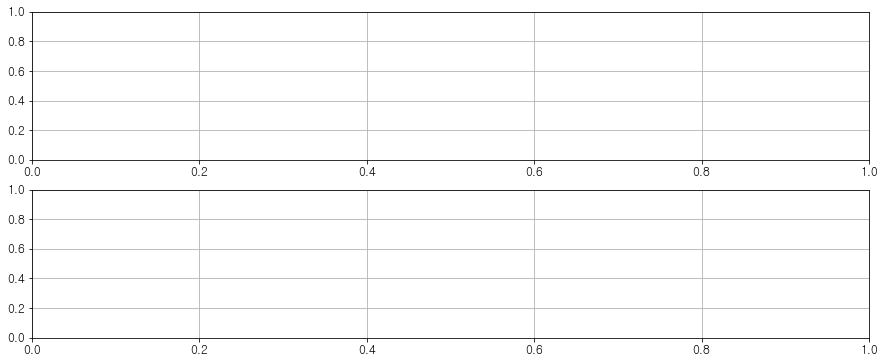

In [15]:
fig = plt.figure(figsize=(15, 6))
axes1 = fig.add_subplot(2, 1, 1)
axes1.grid(True)
axes2 = fig.add_subplot(2, 1, 2)
axes2.grid(True)

In [16]:
axes1.set_ylim([0,60])
axes2.set_ylim([0,60])

(0, 60)

In [17]:
axes1.bar(x = df_do['행정구역별'], height = df_do['popPerScale'], alpha=0.6)
axes1.scatter(x = df_do['행정구역별'], y = df_do['src_count'])
axes2.bar(x = df_city['행정구역별'], height = df_city['popPerScale'], alpha=0.6)
axes2.scatter(x = df_city['행정구역별'], y = df_city['src_count'])

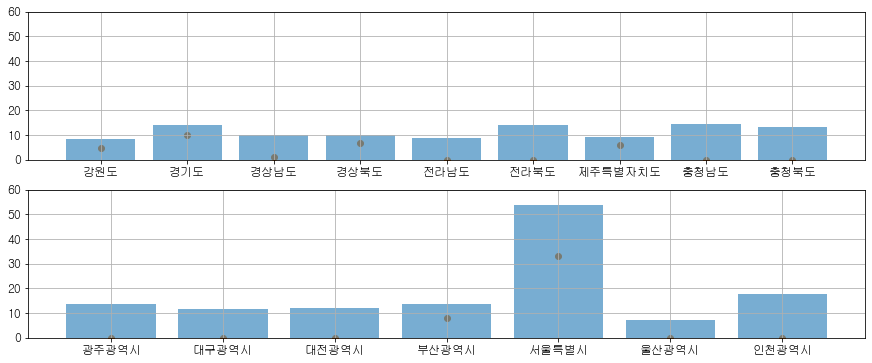

In [18]:
fig